<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/ECCB_one_hot_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [1]:
from tensorflow import keras as K
import tensorflow as tf
import numpy as np
import pandas as pd

# imports below are only for plotting
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from matplotlib.pyplot import figure

In [2]:
def draw_precision_recall_curve(model, sequences, labels):
    probs = model.predict(sequences)
    precision, recall, thresholds = precision_recall_curve(labels, probs)
    plt.plot(recall, precision, marker='.', label='My model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower center")
    plt.title('Precision recall curve')
    auc_precision_recall = auc(recall, precision)
    print("AUC-PR:", auc_precision_recall)
    plt.show()


def ROC_curve(probs, labels):
    fpr, tpr, thresholds = roc_curve(labels, probs)
    auc_score = roc_auc_score(labels, probs)
    print("AUC score: ", auc_score)
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, 'blue', label='My model')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower center")
    plt.title('ROC curve')
    plt.show()


def plot_history(history):
    """
    fun plots history of the training of the model,
    accuracy and loss of the training and validation set

    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()


# Start

## One-hot encoding

In natural language processing, a one-hot vector is a 1 × N matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. One-hot encoding ensures that machine learning does not assume that higher numbers are more important. For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words: the value 'laughter' is not more important than 'laugh'.


One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.


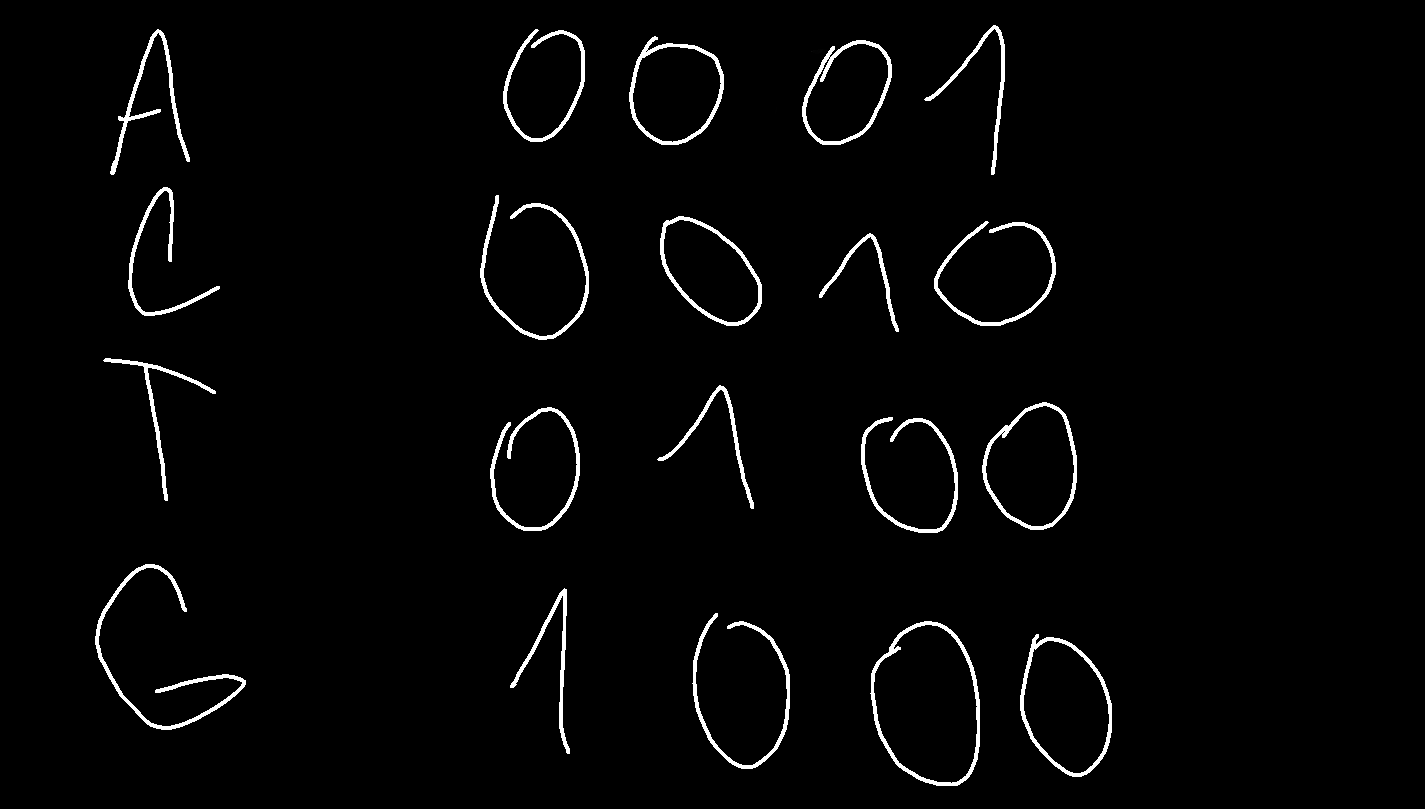

In [3]:
# get test dataset
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt


--2021-07-12 09:59:16--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63000000 (60M) [text/plain]
Saving to: ‘train_set_1_1.txt’

train_set_1_1.txt   100%[===================>]  60.08M   189MB/s    in 0.3s    

2021-07-12 09:59:17 (189 MB/s) - ‘train_set_1_1.txt’ saved [63000000/63000000]



In [4]:
df_train = pd.read_csv("train_set_1_1.txt", sep='\t', names=['sequence', 'label'])

labels_train = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df_train['label']))))
dataset_train = df_train['sequence'].tolist()


nucleo_dic = {
    "A": 0,
    "C": 1,
    "T": 2,
    "G": 3,
    "N": 4,
}

dataset_ordinal_train = [[nucleo_dic[letter] for letter in sequence] for sequence in dataset_train]

example_sequence = 42
print(dataset_train[example_sequence])
print(dataset_ordinal_train[example_sequence])

CCGAGGTAAAAGTGCTGAAACCATGTGAATAAAATACAGGTGGGTTCCGCCAGCTTCGCTCCTGAACCTACCCGCGCTCGGGATCCAGAAGCTGCGCCGGGAGAGAGGGGCTCAGGCCTGGGCGGAGGGGACGGAGGTCAGACCGTGCGGAAAGTGACCCGGGCACCCCAGGGCGCCCAGGCCCCCAGGGAGCGCGGAAA
[1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 3, 1, 2, 3, 0, 0, 0, 1, 1, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 3, 3, 2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 1, 0, 3, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 1, 0, 3, 0, 0, 3, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 2, 1, 0, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 2, 1, 0, 3, 0, 1, 1, 3, 2, 3, 1, 3, 3, 0, 0, 0, 3, 2, 3, 0, 1, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 0, 0, 0]


In [5]:
dataset_onehot_train = tf.one_hot(dataset_ordinal_train, depth=5)

print("the length of the dataset", len(dataset_train), len(dataset_ordinal_train), len(dataset_onehot_train))

print("the length of a sequence in the dataset", len(dataset_train[example_sequence]), len(dataset_ordinal_train[example_sequence]), len(dataset_onehot_train[example_sequence]))

print("\n Let's check examples of how the ACTG characters got translated into one-hot: \n")
print("characters: ", dataset_train[example_sequence][0:3])
print("ordinal form: ", dataset_ordinal_train[example_sequence][0:3])
print("one-hot: ", dataset_onehot_train[example_sequence][0:3], "\n")

print("characters: ", dataset_train[example_sequence][80:85])
print("ordinal form: ", dataset_ordinal_train[example_sequence][80:85])
print("one-hot: ", dataset_onehot_train[example_sequence][80:85])

the length of the dataset 300000 300000 300000
the length of a sequence in the dataset 200 200 200

 Let's check examples of how the ACTG characters got translated into one-hot: 

characters:  CCG
ordinal form:  [1, 1, 3]
one-hot:  tf.Tensor(
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]], shape=(3, 5), dtype=float32) 

characters:  GGATC
ordinal form:  [3, 3, 0, 2, 1]
one-hot:  tf.Tensor(
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(5, 5), dtype=float32)


ToDo ??? bonus: 

!pip install tensorflow_io

import tensorflow_io as tfio

tfio.genome.sequences_to_onehot(dataset)

https://www.tensorflow.org/io/api_docs/python/tfio/genome/sequences_to_onehot

# Regularization

Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. 

## Overfitting

Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms to make predictions and classify data.

In simple words, overfitting means that the model achieves very high accuracy on the initial training data and very low accuracy on newly unseen data. It is like when teachers always give the same questions in their exams. Their students would easily get very high grades, because they simply memorized the answers. Therefore, the high grades are not a good metric here.

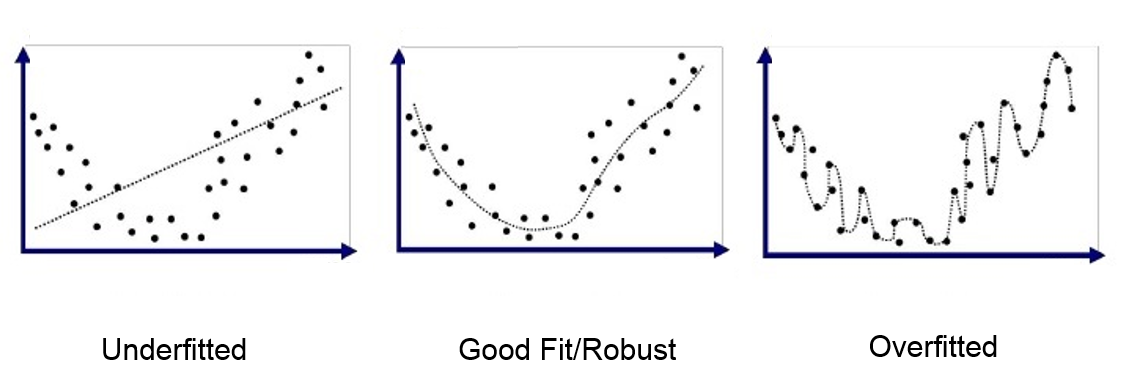

There are various regularization methods. We will have a look at dropout, batch normalization, and weight decay. Other approaches to deal with overfitting are data augmentation, more training samples (larger dataset), tuning the number of parameters of your model (the amount of neurons and layers), early stopping ...

## Dropout

We chose to forbid some neurons of answering and give chance to others. This way we will achieve balance and force all neurons to learn. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. 

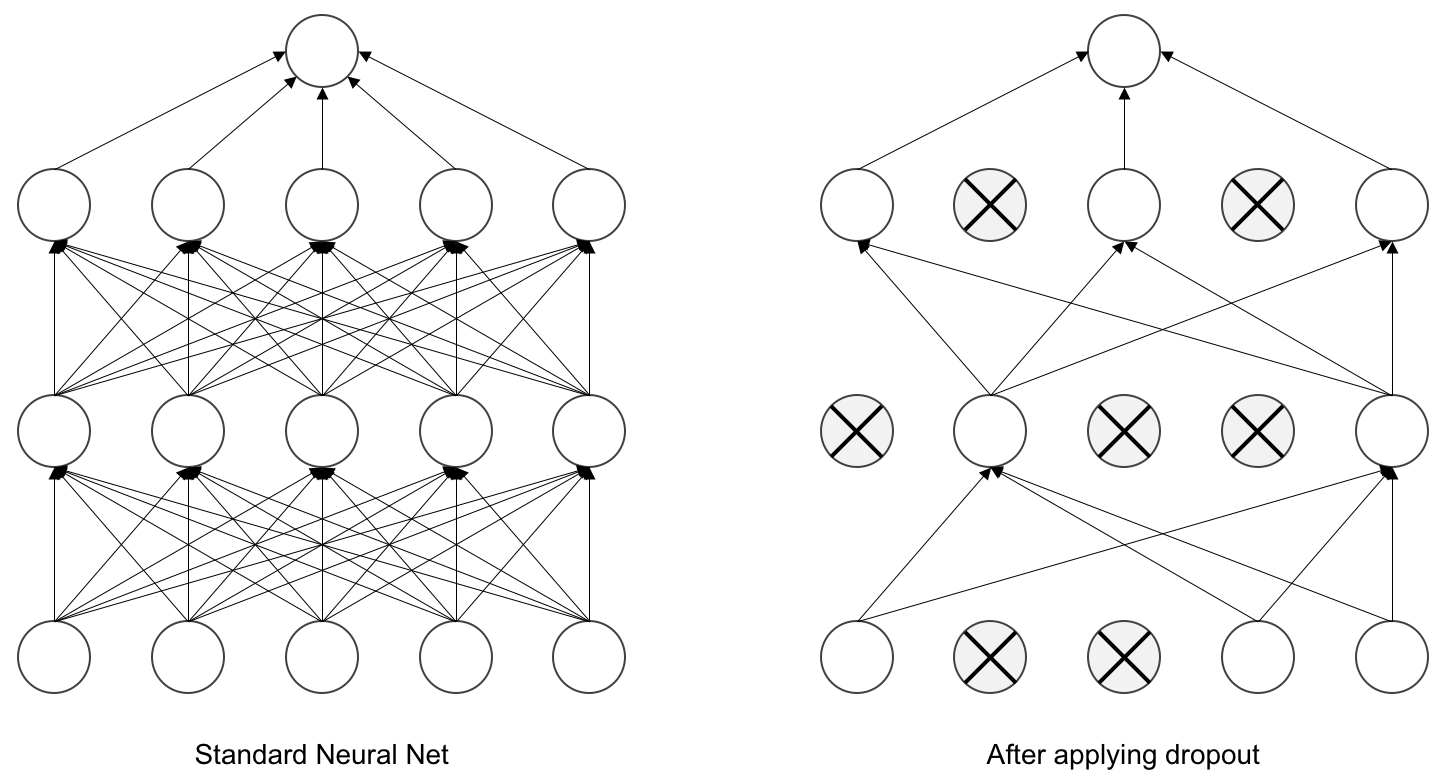



1.   We assign a dropout rate, which represents the percentage of neurons to drop (e.g. 20% of neurons).
2.   At each stage, we remove random neurons according to the predefined percentage.
3.   We calculate the final output according to the combination of results from the remaining neurons.







## Batch norm

Batch-Normalization (BN) is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable.
It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch. This normalization step is applied right before (or right after) the nonlinear function.

All the current deep learning frameworks have already implemented methods which apply batch normalization. It is usually used as a module which could be inserted as a standard layer in a NN.

**Without batch normalization**
- the boldness of the arrows (weights) visualizes the magnitude of the weight - the bolder the arrow the larger the weight



> 


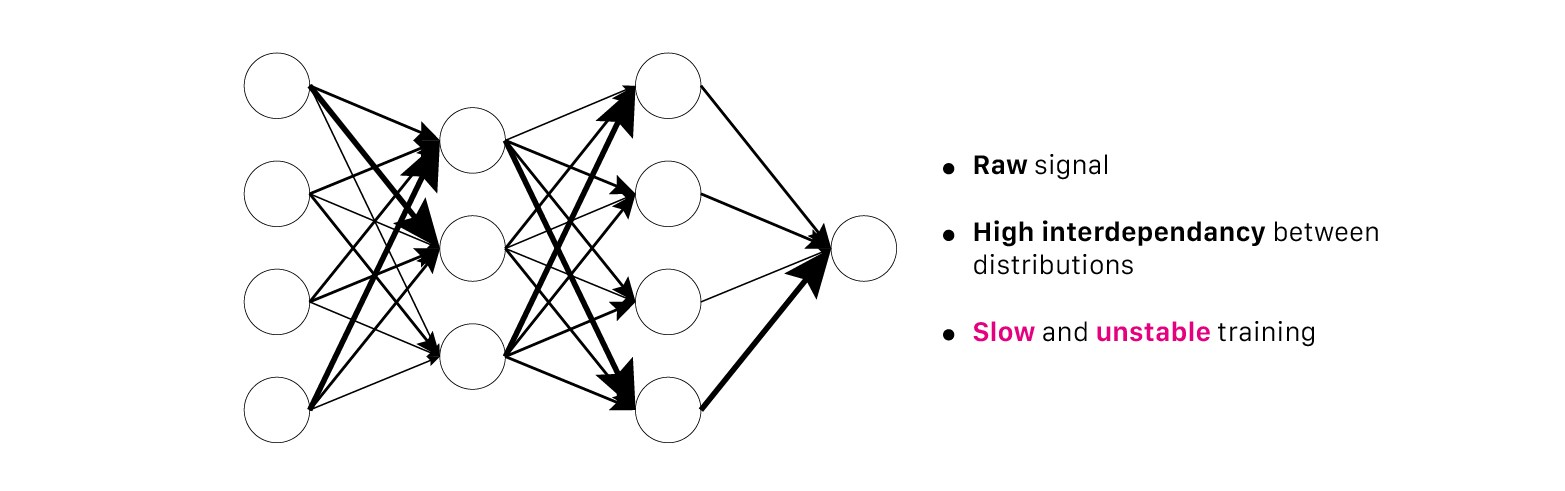

**With batch normalization**
- notice the arrows' (weights') magnitude (boldness) is much smaller and similar to others, that means the signal is normalized

> 


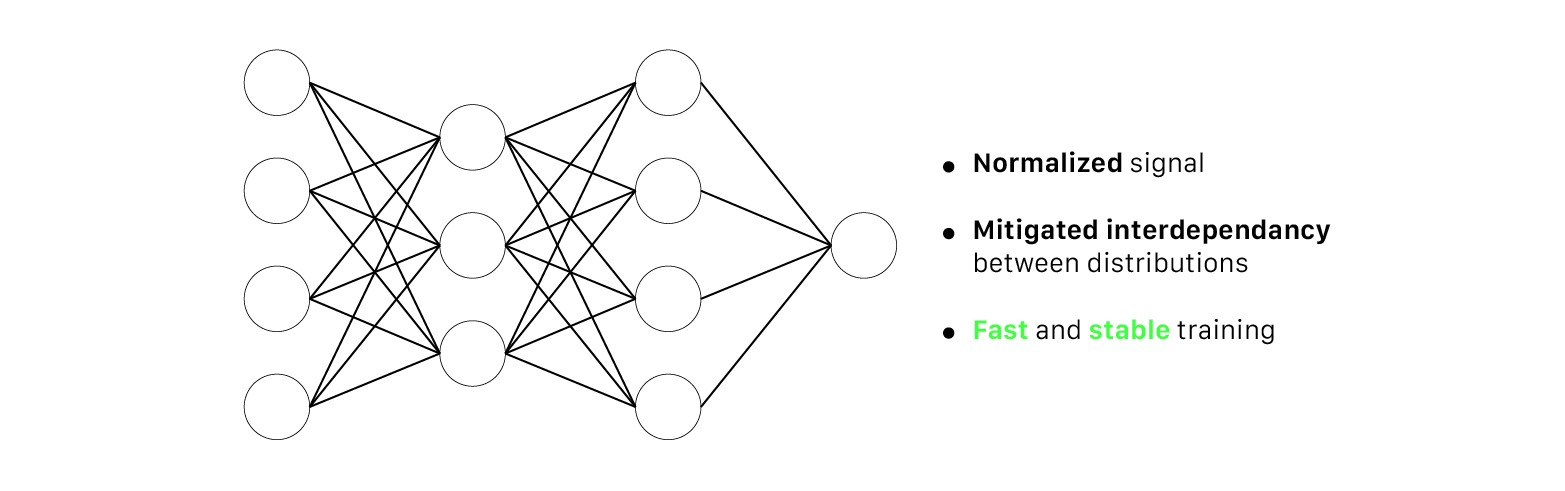

## Weight decay

Weight decay regularizes the NN by adding a small penalty to the loss function. The penalty is based on the magnitude of model weights (all the weights of the model). When using pure stochastic gradient descent (SGD) without momentum, weight decay is the same thing as adding a L2-regularization to the loss. This is not true when using any other optimizer.

loss = loss + weight decay parameter * L2 norm of the weights

L2 norm is a standard method to compute the length of a vector in Euclidean space. Given x = [x1x2 … xn]T, L2 norm of x is defined as the square root of the sum of the squares of the values in each dimension.


Apart from reducing overfitting weight decay also helps to keep the weights small and avoid exploding gradient. Because the L2 norm of the weights are added to the loss, each iteration of your network will try to optimize/minimize the model weights in addition to the loss. This will help keep the weights as small as possible, preventing the weights to grow out of control, and thus avoid exploding gradient.

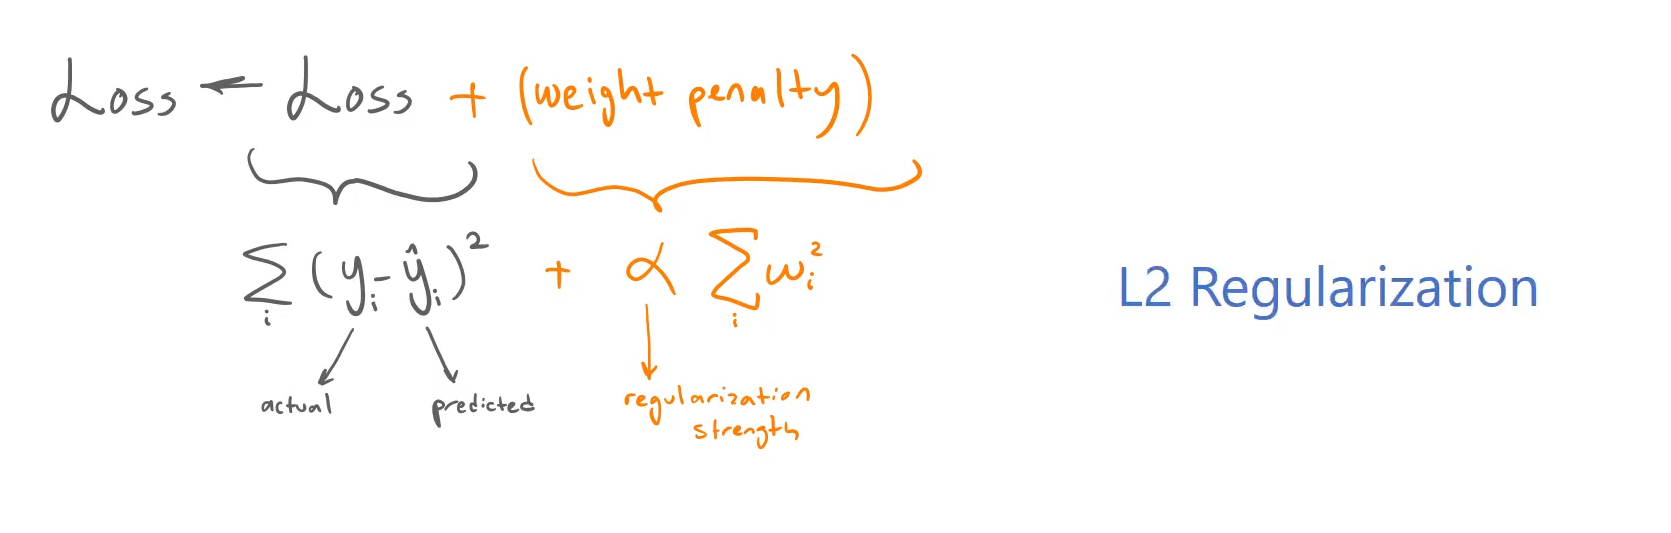

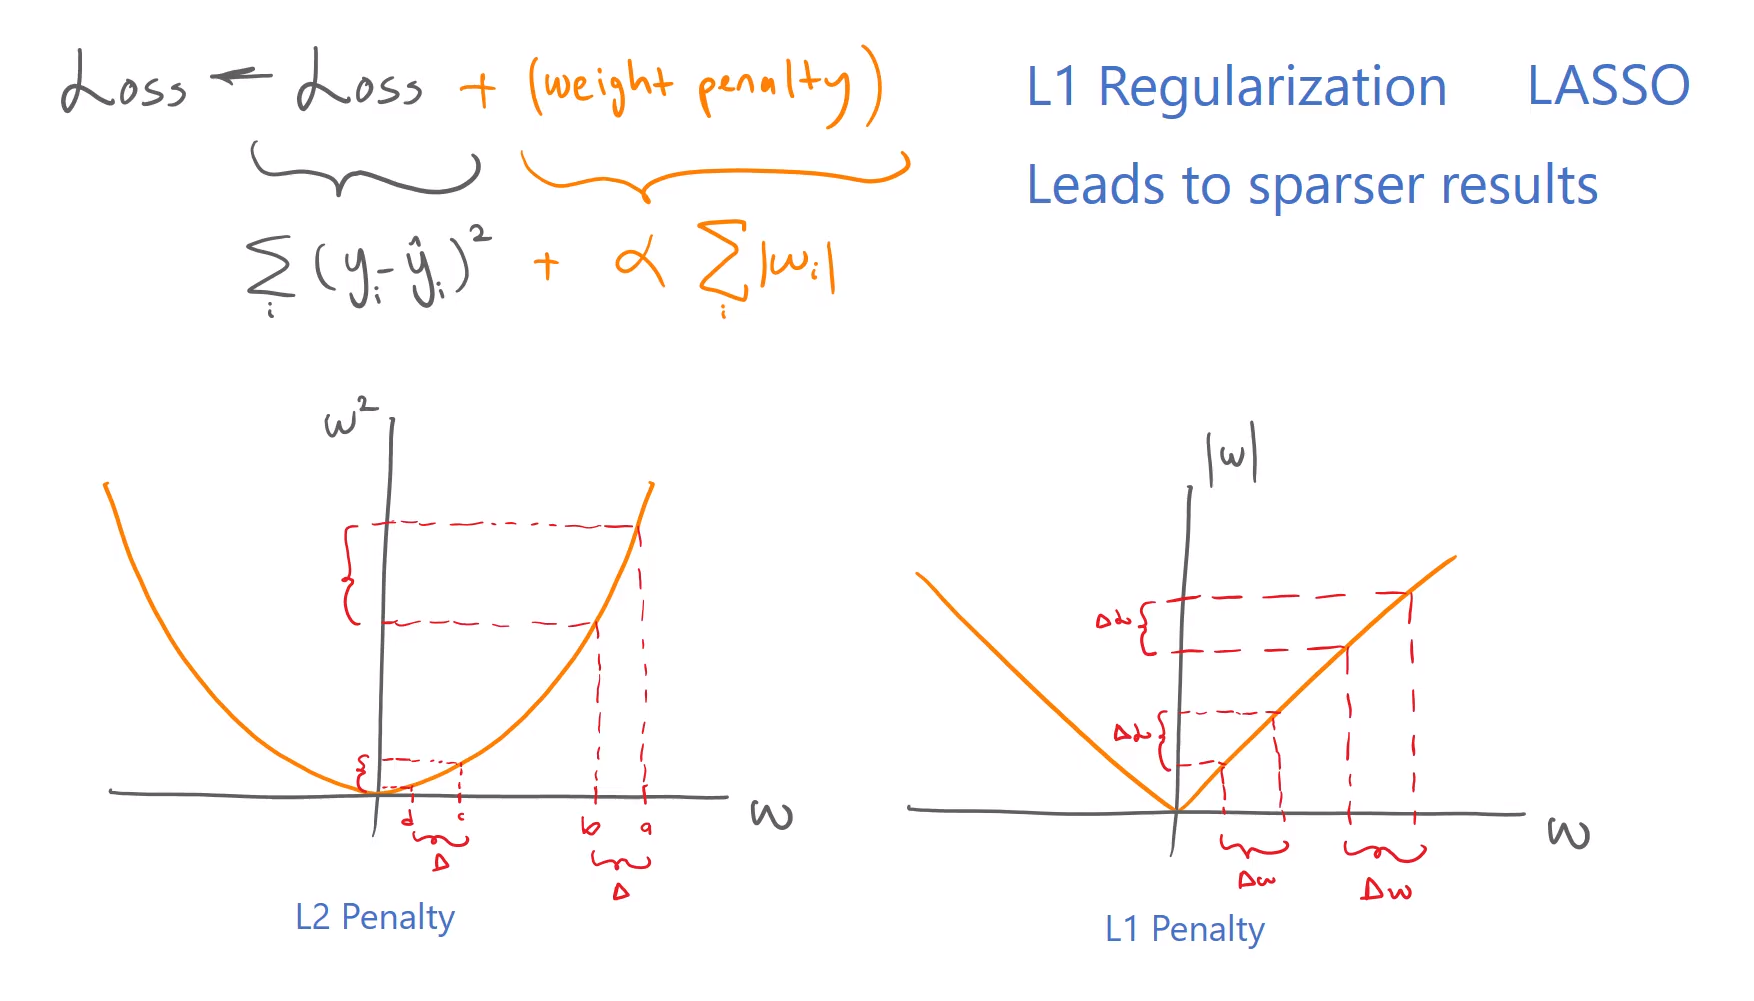

In [6]:
# get training dataset
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt

--2021-07-12 09:59:46--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21000000 (20M) [text/plain]
Saving to: ‘test_set_1_1.txt’

test_set_1_1.txt    100%[===================>]  20.03M  --.-KB/s    in 0.1s    

2021-07-12 09:59:47 (144 MB/s) - ‘test_set_1_1.txt’ saved [21000000/21000000]



In [7]:
df_test = pd.read_csv("test_set_1_1.txt", sep='\t', names=['sequence', 'label'])

labels_test = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df_test['label']))))
dataset_test = df_test['sequence'].tolist()

# we use the same nucleo_dic as on the example before
dataset_ordinal_test = [[nucleo_dic[letter] for letter in sequence] for sequence in dataset_test]

In [8]:
dataset_onehot_test = tf.one_hot(dataset_ordinal_test, depth=5)

In [9]:
# Make the training dataset smaller to demonstrate overfitting.
number_of_examples = 300
print(dataset_onehot_train[0:number_of_examples].shape)
print(labels_train[0:number_of_examples].shape)
dataset_onehot_train_small = dataset_onehot_train[0:number_of_examples]
labels_train_small = labels_train[0:number_of_examples]

(300, 200, 5)
(300,)


In [10]:
# sequence_size = length of the sequence
sequence_size = 200
# channel = each channel corresponds to a nucleotide
channel = len(nucleo_dic)

In [11]:
# create the NN model

model = K.models.Sequential()

model.add(K.layers.Conv1D(
    filters=10,
    kernel_size=6,
    strides=1,
    padding='same',
    data_format="channels_last",
    activation='relu',
    input_shape=(sequence_size, channel)))

# model.add(K.layers.BatchNormalization())
# model.add(K.layers.MaxPooling1D())
# model.add(K.layers.Dropout(0.3))

model.add(K.layers.Conv1D(
    filters=10,
    kernel_size=6,
    strides=1,
    padding='same',
    data_format="channels_last",
    activation='relu'))

# model.add(K.layers.BatchNormalization())
# model.add(K.layers.MaxPooling1D())
# model.add(K.layers.Dropout(0.3))

model.add(K.layers.Flatten())

model.add(K.layers.Dense(10, activation="relu"))
# model.add(K.layers.BatchNormalization())
# model.add(K.layers.Dropout(0.2))

model.add(K.layers.Dense(1, activation='sigmoid'))

model.summary()

# nebo SGD?
optimizer = K.optimizers.SGD()

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 10)           310       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 10)           610       
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 20,941
Trainable params: 20,941
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    dataset_onehot_train_small,
    labels_train_small,
    batch_size=32,
    epochs=20,
    # notice the validation split, this split is always taken from the end of the training dataset before shuffle
    #   so, as long as our dataset is the same, train-validation split will also be the same
    validation_split=0.2
)

model_path = 'model.h5'
model.save(model_path)

Epoch 1/20
8/8 [==============================] - 1s 39ms/step - loss: 0.7030 - accuracy: 0.4333 - val_loss: 0.7093 - val_accuracy: 0.3500
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 0.6992 - accuracy: 0.4625 - val_loss: 0.7098 - val_accuracy: 0.4333
Epoch 3/20
8/8 [==============================] - 0s 14ms/step - loss: 0.6959 - accuracy: 0.4833 - val_loss: 0.7097 - val_accuracy: 0.4333
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5208 - val_loss: 0.7105 - val_accuracy: 0.4667
Epoch 5/20
8/8 [==============================] - 0s 14ms/step - loss: 0.6899 - accuracy: 0.5583 - val_loss: 0.7109 - val_accuracy: 0.4667
Epoch 6/20
8/8 [==============================] - 0s 14ms/step - loss: 0.6876 - accuracy: 0.5500 - val_loss: 0.7104 - val_accuracy: 0.5167
Epoch 7/20
8/8 [==============================] - 0s 13ms/step - loss: 0.6851 - accuracy: 0.5583 - val_loss: 0.7105 - val_accuracy: 0.5167
Epoch 8/20
8/8 [===========

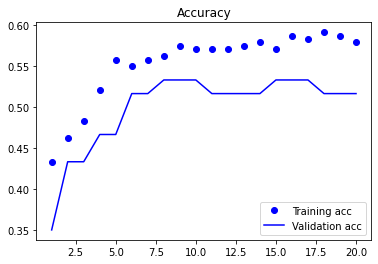

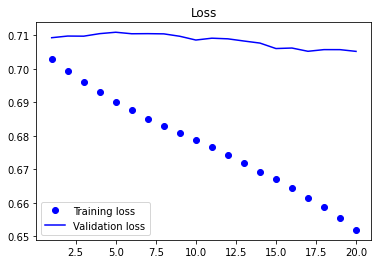

In [13]:
plot_history(history)

model evaluation on unknown (that is "test") dataset [loss, accuracy]: [0.6847556233406067, 0.5063999891281128]
AUC-PR: 0.6798944467153217


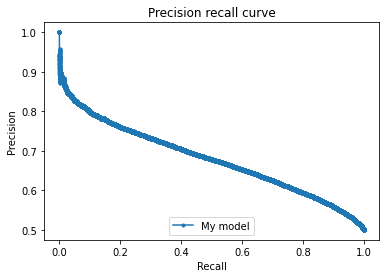

In [14]:
metrics = model.evaluate(
    dataset_onehot_test,
    labels_test,
    verbose=0
)

print('model evaluation on unknown (that is "test") dataset [loss, accuracy]:', metrics)
draw_precision_recall_curve(model, dataset_onehot_test, labels_test)


## Model with dropout, batch norm, and weight decay

In [15]:
# !pip install tensorflow_addons

In [16]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout, Activation 

from tensorflow_addons.optimizers import AdamW

# create NN model with regularization

model_reg = Sequential([
    Conv1D(
        filters=10,
        kernel_size=6,
        padding='same',
        data_format="channels_last",
        activation='relu',
        input_shape=(sequence_size, channel),
        # kernel_regularizer=regularizers.l2(0.001),
    ),
    BatchNormalization(),
    # MaxPooling1D(),
    Dropout(0.3),

    Conv1D(
      filters=10,
      kernel_size=6,
      padding='same',
      data_format="channels_last",
      activation='relu',
      # kernel_regularizer=regularizers.l2(0.001),
    ),
    BatchNormalization(),
    # MaxPooling1D(),
    Dropout(0.3),
    Flatten(),

    Dense(
      10, 
      activation="relu",
      # kernel_regularizer=regularizers.l2(0.001),
    ),
    BatchNormalization(),
    Dropout(0.2),

    Dense(
      1, 
      activation='sigmoid',
      # kernel_regularizer=regularizers.l2(0.001),
    )

])

model_reg.summary()

# Add weight decay
# notice, since we are using Adam optimizer, to add weight decay we use a version of Adam which has the weight decay already implemented
# optimizer = AdamW(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False, weight_decay=1e-4)
optimizer = K.optimizers.SGD()


model_reg.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)




ModuleNotFoundError: ignored

In [ ]:
history = model_reg.fit(
    dataset_onehot_train_small,
    labels_train_small,
    batch_size=32,
    epochs=20,
    # notice the validation split, this split is always taken from the end of the training dataset before shuffle
    #   so, as long as our dataset is the same, train-validation split will also be the same
    validation_split=0.2
)

model_reg_path = 'model_regularization.h5'
model_reg.save(model_reg_path)

In [ ]:
plot_history(history)

In [ ]:
metrics = model_reg.evaluate(
    dataset_onehot_test,
    labels_test,
    verbose=0
)

print('model_reg evaluation on unknown (that is "test") dataset [loss, accuracy]:', metrics)
draw_precision_recall_curve(model_reg, dataset_onehot_test, labels_test)


## Export the model to TF.js

In [ ]:
# !pip install tensorflowjs
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model_reg, "./export_model")

# import shutil
# shutil.make_archive("export_model", 'zip', "export_model/")

# from google.colab import files
# files.download('export_model.zip')